In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("protests.csv")

In [3]:
df.head()

,date,case,location,time,incident,week,week_day,month
0,2019-06-10,Police strongly condemn law-breaking behaviour...,Admiralty,0.0,block roads,W1,weekday,June
1,2019-06-12,Police take action to stop riot,Admiralty,800.0,vandalism,W1,weekday,June
2,2019-06-21,Police condemn protestors for besieging Police...,Wan Chai,1050.0,vandalism,W2,weekday,June
3,2019-06-26,Police stringently follow up on illegal activi...,Wan Chai,2230.0,vandalism,W3,weekday,June
4,2019-07-01,Police to conduct dispersal action in the vici...,Admiralty,400.0,vandalism,W4,weekend/holiday,July


In [4]:
df.week.value_counts()

W17    35
W23    26
W18    18
W9     15
W8     15
W22    15
W21    14
W12    14
W24     9
W11     7
W25     6
W20     6
W14     6
W10     6
W15     5
W16     5
W19     5
W13     5
W7      4
W6      4
W4      3
W5      2
W1      2
W2      1
W3      1
Name: week, dtype: int64

In [24]:
df['date'] = df['date'].astype('datetime64[ns]')
df.head()

,date,case,location,time,incident,week,week_day,month,new-date
0,2019-06-10,Police strongly condemn law-breaking behaviour...,Admiralty,0.0,block roads,W1,weekday,June,2019-06-10
1,2019-06-12,Police take action to stop riot,Admiralty,800.0,vandalism,W1,weekday,June,2019-06-12
2,2019-06-21,Police condemn protestors for besieging Police...,Wan Chai,1050.0,vandalism,W2,weekday,June,2019-06-21
3,2019-06-26,Police stringently follow up on illegal activi...,Wan Chai,2230.0,vandalism,W3,weekday,June,2019-06-26
4,2019-07-01,Police to conduct dispersal action in the vici...,Admiralty,400.0,vandalism,W4,weekend/holiday,July,2019-07-01


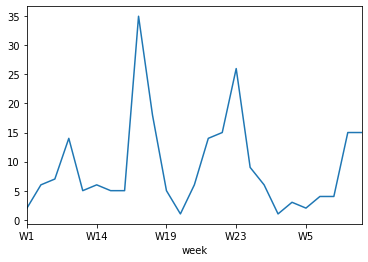

In [28]:
df.sort_values(by='date').groupby('week').size().plot()

In [31]:
df['new-w'] = df['week'].str.extract("W(.*)", expand=False).astype('int')
df.head()

,date,case,location,time,incident,week,week_day,month,new-date,new-w
0,2019-06-10,Police strongly condemn law-breaking behaviour...,Admiralty,0.0,block roads,W1,weekday,June,2019-06-10,1
1,2019-06-12,Police take action to stop riot,Admiralty,800.0,vandalism,W1,weekday,June,2019-06-12,1
2,2019-06-21,Police condemn protestors for besieging Police...,Wan Chai,1050.0,vandalism,W2,weekday,June,2019-06-21,2
3,2019-06-26,Police stringently follow up on illegal activi...,Wan Chai,2230.0,vandalism,W3,weekday,June,2019-06-26,3
4,2019-07-01,Police to conduct dispersal action in the vici...,Admiralty,400.0,vandalism,W4,weekend/holiday,July,2019-07-01,4


In [32]:
df.dtypes

date        datetime64[ns]
case                object
location            object
time               float64
incident            object
week                object
week_day            object
month               object
new-date    datetime64[ns]
new-w                int64
dtype: object

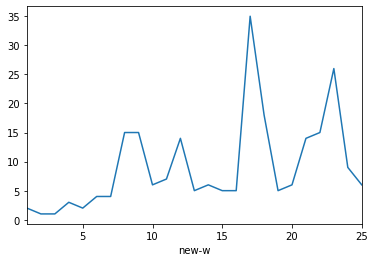

In [37]:
df.sort_values(by='new-w').groupby('new-w').size().plot()

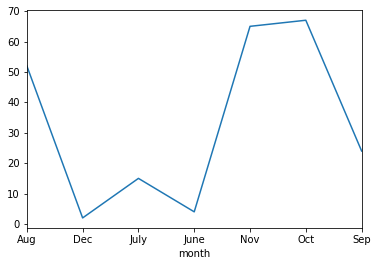

In [38]:
df.sort_values(by='new-w').groupby('month').size().plot()

In [41]:
df.groupby('month').week_day.value_counts()

month  week_day       
Aug    weekend/holiday    44
       weekday             8
Dec    weekend/holiday     2
July   weekend/holiday    13
       weekday             2
June   weekday             4
Nov    weekday            38
       weekend/holiday    27
Oct    weekend/holiday    51
       weekday            16
Sep    weekend/holiday    22
       weekday             2
Name: week_day, dtype: int64

In [52]:
df.location.value_counts().head(8)

Mong Kok         26
Tsim Sha Tsui    24
Sha Tin          17
Causeway Bay     14
Wong Tai Sin     11
Admiralty        10
Yuen Long        10
Wan Chai         10
Name: location, dtype: int64

In [51]:
df.groupby(['location','month']).size().unstack().sort_values('June',ascending=False)

month,Aug,Dec,July,June,Nov,Oct,Sep
location,,,,,,,
Admiralty,3.0,NaN,2.0,2.0,NaN,1.0,2.0
Wan Chai,3.0,NaN,1.0,2.0,1.0,NaN,3.0
Aberdeen,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Airport,1.0,NaN,NaN,NaN,NaN,NaN,1.0
Causeway Bay,4.0,NaN,1.0,NaN,2.0,4.0,3.0
Central,1.0,NaN,NaN,NaN,2.0,4.0,2.0
Chai Wan,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Hang Hau,1.0,NaN,NaN,NaN,1.0,NaN,NaN
Hung Hom,4.0,NaN,NaN,NaN,2.0,NaN,NaN


In [4]:
df2 = df.groupby(['incident','month']).size().unstack().sort_values('June',ascending=False)
df2

month,Aug,Dec,July,June,Nov,Oct,Sep
incident,,,,,,,
vandalism,16.0,NaN,5.0,3.0,16.0,27.0,9.0
block roads,22.0,NaN,4.0,1.0,23.0,22.0,7.0
assault,2.0,1.0,3.0,NaN,5.0,NaN,1.0
set fire,8.0,NaN,1.0,NaN,11.0,17.0,7.0
target police,NaN,NaN,NaN,NaN,NaN,1.0,NaN
targeting police,4.0,1.0,2.0,NaN,3.0,NaN,NaN


In [5]:
df2.to_clipboard()